In [ ]:
train <- read.csv("train.csv")
test <- read.csv("test.csv")
stores <- read.csv("stores.csv")
features <- read.csv("features.csv")

In [ ]:
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘pROC’




In [ ]:
library(caret)

Loading required package: lattice

Loading required package: ggplot2



In [ ]:
head(train)

,Store,Dept,Date,Weekly_Sales,IsHoliday
,<int>,<int>,<fct>,<dbl>,<lgl>
1,1,1,2010-02-05,24924.50,FALSE
2,1,1,2010-02-12,46039.49,TRUE
3,1,1,2010-02-19,41595.55,FALSE
4,1,1,2010-02-26,19403.54,FALSE
5,1,1,2010-03-05,21827.90,FALSE
6,1,1,2010-03-12,21043.39,FALSE


In [ ]:
head(test)

,Store,Dept,Date,IsHoliday
,<int>,<int>,<fct>,<lgl>
1,1,1,2012-11-02,FALSE
2,1,1,2012-11-09,FALSE
3,1,1,2012-11-16,FALSE
4,1,1,2012-11-23,TRUE
5,1,1,2012-11-30,FALSE
6,1,1,2012-12-07,FALSE


In [ ]:
head(stores)

,Store,Type,Size
,<int>,<fct>,<int>
1,1,A,151315
2,2,A,202307
3,3,B,37392
4,4,A,205863
5,5,B,34875
6,6,A,202505


In [ ]:
head(features)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,1,2010-02-05,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,FALSE
2,1,2010-02-12,38.51,2.548,NA,NA,NA,NA,NA,211.2422,8.106,TRUE
3,1,2010-02-19,39.93,2.514,NA,NA,NA,NA,NA,211.2891,8.106,FALSE
4,1,2010-02-26,46.63,2.561,NA,NA,NA,NA,NA,211.3196,8.106,FALSE
5,1,2010-03-05,46.50,2.625,NA,NA,NA,NA,NA,211.3501,8.106,FALSE
6,1,2010-03-12,57.79,2.667,NA,NA,NA,NA,NA,211.3806,8.106,FALSE


In [ ]:
length(unique(train$Store)) ### Total 45 Stores 
length(unique(train$Dept)) ## 81 Departments

[1] 45

[1] 81

In [ ]:
#Aggregate the Data by Dept / Store_Dept Combination
## Store Level Aggr
library(dplyr)
Avg_store_sales=train%>%
group_by(Store) %>%
summarise(Avg_store_weekly_sales=mean(Weekly_Sales), .groups = 'drop')%>%
arrange(desc(Avg_store_weekly_sales))


In [ ]:
head(Avg_store_sales)

Store,Avg_store_weekly_sales
<int>,<dbl>
20,29508.30
4,29161.21
14,28784.85
13,27355.14
2,26898.07
10,26332.30


In [ ]:
## Dept Level Aggr
library(dplyr) 
Avg_dept_sales=train%>%
group_by(Dept) %>%
summarise(Avg_Dept_weekly_sales=mean(Weekly_Sales), .groups = 'drop')%>%
arrange(desc(Avg_Dept_weekly_sales))


In [ ]:
head(Avg_dept_sales)

Dept,Avg_Dept_weekly_sales
<int>,<dbl>
92,75204.87
95,69824.42
38,61090.62
72,50566.52
65,45441.71
90,45232.08


In [ ]:
## Store and Dept Level Aggr
train$store_dept=paste(train$Store,train$Dept,sep="_")
Avg_store_dept_sales=train%>%
group_by(store_dept) %>%
summarise(Avg_store_Dept_weekly_sales=mean(Weekly_Sales), .groups = 'drop')%>%
arrange(desc(Avg_store_Dept_weekly_sales))

In [ ]:
head(Avg_store_dept_sales)

store_dept,Avg_store_Dept_weekly_sales
<chr>,<dbl>
14_92,182528.0
2_92,164840.2
20_92,164633.7
13_92,162034.1
4_92,159365.1
20_95,150614.0


In [ ]:
## Merge the Store_Dept level Avg sales in test set by their store_dept_ky

test$store_dept=paste(test$Store,test$Dept,sep="_")

temp=merge(test,Avg_store_dept_sales,by="store_dept",all.x = T)
temp=merge(temp,Avg_dept_sales,by="Dept",all.x = T)
temp$Avg_store_Dept_weekly_sales=ifelse(is.na(temp$Avg_store_Dept_weekly_sales),
temp$Avg_Dept_weekly_sales,temp$Avg_store_Dept_weekly_sales)
temp$Id=paste(temp$store_dept,temp$Date,sep="_")
subm1=data.frame(Id=temp$Id,Weekly_Sales=temp$Avg_store_Dept_weekly_sales)
sum(is.na(subm1$Weekly_Sales))
head(subm1)


[1] 0

,Id,Weekly_Sales
,<fct>,<dbl>
1,1_1_2013-02-08,22513.32
2,1_1_2013-02-15,22513.32
3,1_1_2013-01-25,22513.32
4,1_1_2013-04-05,22513.32
5,1_1_2013-04-12,22513.32
6,1_1_2012-11-23,22513.32


In [ ]:
train$Str_dept=paste(train$Store,train$Dept,sep="_")
test$Str_dept=paste(test$Store,test$Dept,sep="_")
head(train)

,Store,Dept,Date,Weekly_Sales,IsHoliday,store_dept,Str_dept
,<int>,<int>,<fct>,<dbl>,<lgl>,<chr>,<chr>
1,1,1,2010-02-05,24924.50,FALSE,1_1,1_1
2,1,1,2010-02-12,46039.49,TRUE,1_1,1_1
3,1,1,2010-02-19,41595.55,FALSE,1_1,1_1
4,1,1,2010-02-26,19403.54,FALSE,1_1,1_1
5,1,1,2010-03-05,21827.90,FALSE,1_1,1_1
6,1,1,2010-03-12,21043.39,FALSE,1_1,1_1


In [ ]:
train_store_dept_11=train[train$Str_dept=="1_1",]
test_store_dept_11=test[test$Str_dept=="1_1",]

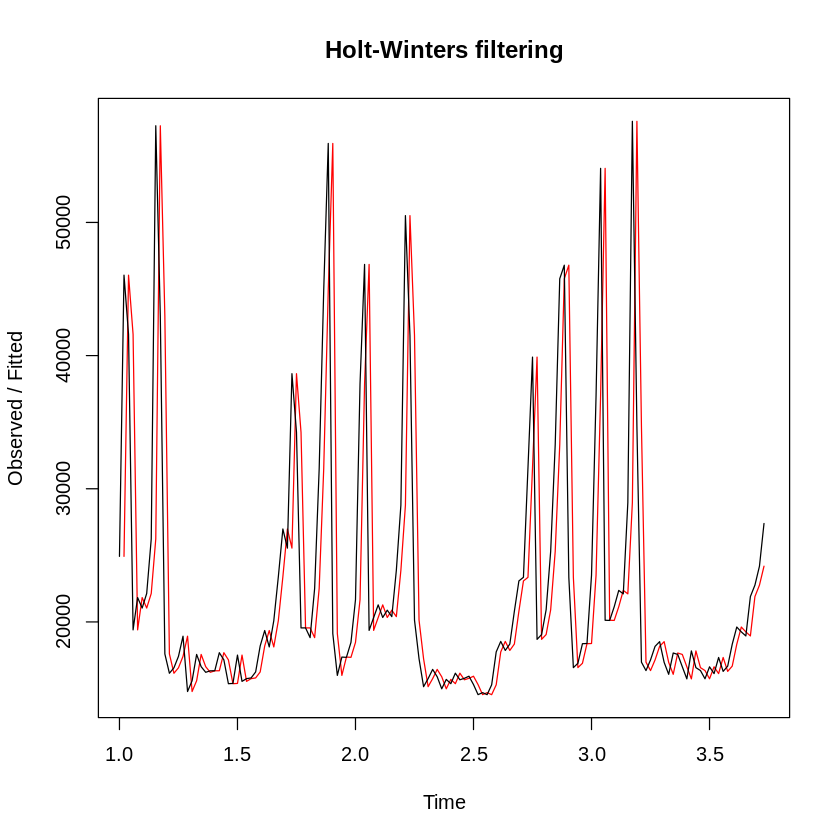

In [ ]:
myts <- ts(train_store_dept_11$Weekly_Sales,frequency=52) ## Holwinter
fit=HoltWinters(myts, beta = F,gamma=FALSE)  ## # simple exponential - models level
plot(fit)


In [ ]:
myts <- ts(train_store_dept_11$Weekly_Sales,frequency=52)
#plot(myts)
fit <- stlf(myts, s.window="period",method="arima")
#summary(fit)


Forecast method: STL +  ARIMA(0,0,1) with non-zero mean

Model Information:
Series: x 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
         ma1        mean
      0.5345  22782.1327
s.e.  0.0748    523.7617

sigma^2 estimated as 16974768:  log likelihood=-1392.35
AIC=2790.69   AICc=2790.87   BIC=2799.58

Error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 6.288714 4091.132 2076.839 -1.544145 7.868231 0.4983759
                    ACF1
Training set -0.02545355

Forecasts:
         Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
3.750000       34123.69 28843.640 39403.74 26048.550 42198.83
3.769231       19132.98 13146.001 25119.95  9976.687 28289.27
3.788462       19311.62 13324.639 25298.59 10155.325 28467.91
3.807692       19871.99 13885.011 25858.96 10715.697 29028.28
3.826923       23908.10 17921.119 29895.07 14751.804 33064.39
3.846154       32400.71 26413.731 38387.68 23244.417 41557.00
3.865385       45331.74 39344.765 51318.

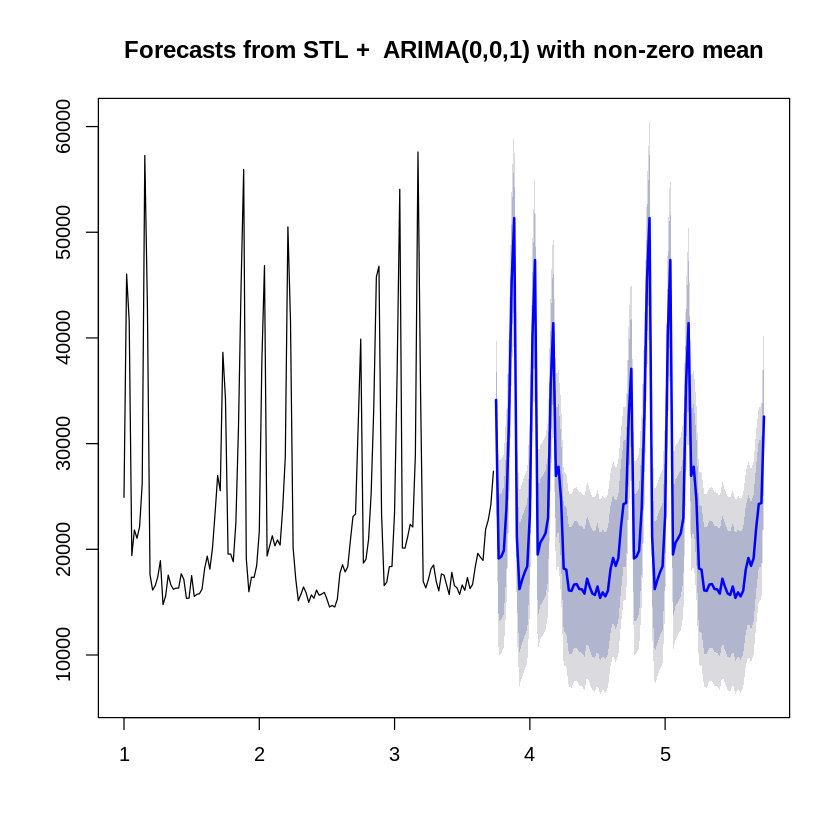

In [ ]:
plot(fit)
summary(fit)

In [ ]:
store_dept_key_test=unique(test$Str_dept)
store_dept_key_train=unique(train$Str_dept)
common_key=intersect(store_dept_key_test,store_dept_key_train)
head(common_key)
length(common_key)

[1] "1_1" "1_2" "1_3" "1_4" "1_5" "1_6"

[1] 3158

In [ ]:
op_all=c()

for(i in 1:length(common_key))
{
  store_dept_sub_train<-train[train$Str_dept==common_key[i],c("Weekly_Sales","Date")]
  store_dept_sub_test<-test[test$Str_dept==common_key[i],]
  
  myts <- ts(store_dept_sub_train$Weekly_Sales,frequency=52)
  
  lead_time=nrow(store_dept_sub_test)
  fit <- try(stlf(myts, s.window="period",h=lead_time,method="arima"),silent = T)
  #summary(fit)
  #plot(fit)
  #fit[[4]]
  pred<-try(as.numeric(fit[[4]]),silent = T)
  store_dept_sub_test$Weekly_Sales=pred
  store_dept_sub_test$Id=paste(store_dept_sub_test$Str_dept,store_dept_sub_test$Date,sep="_")
  
  op=store_dept_sub_test[,c("Id","Weekly_Sales")]
  op_all=rbind(op_all,op)
  #print(i)
}

In [ ]:
sampleSubmission <- read.csv("sampleSubmission.csv")
head(sampleSubmission)

,Id,Weekly_Sales
,<fct>,<int>
1,1_1_2012-11-02,0
2,1_1_2012-11-09,0
3,1_1_2012-11-16,0
4,1_1_2012-11-23,0
5,1_1_2012-11-30,0
6,1_1_2012-12-07,0


In [ ]:
## Export the csv to ur system -- Only if you are executing on ur machine 
write.csv(subm1,file="store_dept.csv",row.names=FALSE)